In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/colabCalisma/retina/"

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
from PIL import Image
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout, Cropping2D
from keras.models import Model
from keras.optimizers import Adam


from tqdm import tqdm

from skimage.io import imread, imshow, imsave, MultiImage
from skimage import data_dir



from skimage.transform import resize
import matplotlib.pyplot as plt



In [ ]:
IMG_WIDTH  = 512
IMG_HEIGHT = 512

IMG_CHANNELS = 3

image_num = 20

TRAIN_PATH = "retinaTrainIm/"
TRAIN_Label = "retinaTrainLabel/"

In [ ]:
X_train = np.zeros((image_num, IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((image_num, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)
i = 1
for n in range(image_num):
    img1 = Image.open(TRAIN_PATH + i.__str__()  + '.tif')
    #img1 = np.array(img1)
    #img2 = imread(TEST_Label + '(' + i.__str__() + ')' + '.tif')
    im = Image.open(TRAIN_Label + i.__str__()  + '.gif')
    #im = np.array(im)
    X_train[n] = img1
    Y_train[n] = im
    i = i + 1

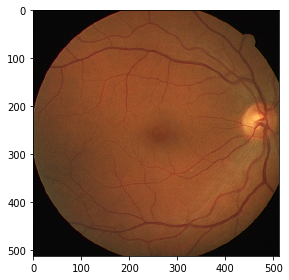

In [ ]:
imshow(X_train[19])

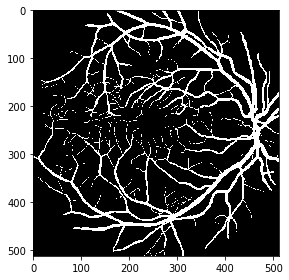

In [ ]:
imshow(Y_train[3])
import matplotlib.cm as cm
plt.imsave( 'deneme11.png',Y_train[3],cmap = cm.binary_r)

In [ ]:
# Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
imshow(X_train[5])
# Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal',padding='same')(s)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.Dropout(0.2)(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.Dropout(0.2)(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.Dropout(0.2)(c5)
p5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c5)

c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
p6 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c6)


c7 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p6)
c7 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.Dropout(0.2)(c7)


# Expansive path

u8 = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c6])
c8 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.Dropout(0.2)(c8)

u9 = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c5])
c9 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.Dropout(0.2)(c9)

u10 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c9)
u10 = tf.keras.layers.concatenate([u10, c4])
c10 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)
c10 = tf.keras.layers.Dropout(0.2)(c10)


u11 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c10)
u11 = tf.keras.layers.concatenate([u11, c3])
c11 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
c11 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)
c11 = tf.keras.layers.Dropout(0.2)(c11)

u12 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c11)
u12 = tf.keras.layers.concatenate([u12, c2])
c12 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u12)
c12 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c12)
c12 = tf.keras.layers.Dropout(0.2)(c12)



u13 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c12)
u13 = tf.keras.layers.concatenate([u13, c1], axis=3)
c13 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u13)
c13 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c13)
c13 = tf.keras.layers.Dropout(0.2)(c13)



outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c13)
#outputs_crop = tf.image.resize_with_crop_or_pad(outputs, 564, 564)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
################################
# Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_retina.h5', verbose=1, save_best_only=True)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')]

#results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=4, epochs=15, callbacks=callbacks)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=4, epochs=150)

model.save('retinaTrainedModel3.h5')


In [ ]:
test_image_label = 'retina_test1_label/'
test_image = 'retinaTestIm/'
X_test = np.zeros((image_num, IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((image_num, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)
i = 1
for n in range(image_num):
    img1 = Image.open(test_image + i.__str__()  + '.tif')
    #img1 = np.array(img1)
    #img2 = imread(TEST_Label + '(' + i.__str__() + ')' + '.tif')
    im = Image.open(test_image_label + i.__str__()  + '.gif')
    #im = np.array(im)
    X_test[n] = img1
    Y_test[n] = im
    i = i + 1
    

In [ ]:
resutl_path = 'segmented_result/'
evaluate_result = model.evaluate(X_test,Y_test)
evaluate_result

In [ ]:
numpy_accuracy= np.array(results.history['accuracy'])
np.savetxt("train_accuracy.txt", numpy_accuracy, delimiter=",")

numpy_val_accuracy= np.array(results.history['val_accuracy'])
np.savetxt("val_accuracy.txt", numpy_val_accuracy, delimiter=",")


numpy_loss= np.array(results.history['loss'])
np.savetxt("train_loss.txt", numpy_loss, delimiter=",")

numpy_val_loss= np.array(results.history['val_loss'])
np.savetxt("val_loss.txt", numpy_val_loss, delimiter=",")

In [ ]:
preds_test = model.predict(X_test, verbose=1)


1/1 [==============================] - 0s 294ms/step


In [ ]:
#preds_test_threshold = (preds_test > 0.35).astype(np.bool)
preds_test_threshold = preds_test_threshold.reshape((20,512,512))
preds_test = preds_test.reshape((20,512,512))

for n in range(20):
    plt.imsave(resutl_path +'/test_pred_withThreshold/' + n.__str__() + '.png',preds_test_threshold[n],cmap = cm.binary_r)
    plt.imsave(resutl_path +'/without_threshold/' + n.__str__() + '.png',preds_test[n])